In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Question 2: Load data

In [2]:
#load information about the number and parental orign of each 
#de novo mutation detected in offspring individual
df_num_par_orig = pd.read_csv('aau1043_dnm.tsv')
df_num_par_orig

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
#load ages of parents of each proband
df_age_par = pd.read_csv('aau1043_parental_age.tsv')
df_age_par

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


# Question 3: Number of de novo mutations per proband

In [4]:
#value count for total, paternal, maternal then put together in dataframe
df_pat_dnm = df_num_par_orig[df_num_par_orig['Phase_combined']=='father'].Proband_id.value_counts().to_frame().reset_index().rename(columns={"Proband_id": "pat_dnm", "index": "Proband_id"})
df_mat_dnm = df_num_par_orig[df_num_par_orig['Phase_combined']=='mother'].Proband_id.value_counts().to_frame().reset_index().rename(columns={"Proband_id": "mat_dnm", "index": "Proband_id"})
df_tot_dnm = df_num_par_orig.Proband_id.value_counts().to_frame().reset_index().rename(columns={"Proband_id": "tot_dnm", "index": "Proband_id"})
df_all_dnm = pd.merge(df_pat_dnm, df_mat_dnm, on='Proband_id')
df_all_dnm = pd.merge(df_all_dnm, df_tot_dnm, on='Proband_id')
df_all_dnm

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,99984,91,12,103
4,64166,88,16,105
...,...,...,...,...
391,76504,27,5,34
392,1097,26,12,39
393,13990,25,7,33
394,36430,25,16,42


# Question 4: Merge with data frame with ages

In [5]:
df_all_dnm_age = pd.merge(df_all_dnm, df_age_par, on='Proband_id')
df_all_dnm_age

,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


# Question 5: Plot mat or pat dnm vs mat or pat age

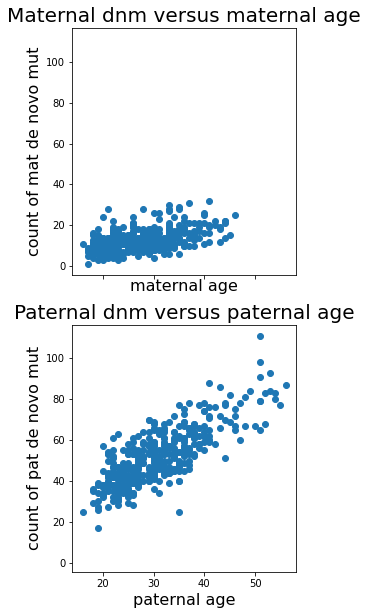

In [6]:
fig, ax = plt.subplots( nrows = 2, sharex=True, sharey=True, figsize=(4,10) )
ax[0].scatter(df_all_dnm_age['Mother_age'], df_all_dnm_age['mat_dnm'])
ax[1].scatter(df_all_dnm_age['Father_age'], df_all_dnm_age['pat_dnm'])
ax[0].set_title('Maternal dnm versus maternal age', fontsize = 20)
ax[1].set_title('Paternal dnm versus paternal age', fontsize = 20)
ax[0].set_ylabel('count of mat de novo mut', fontsize = 16)
ax[1].set_ylabel('count of pat de novo mut', fontsize = 16)
ax[0].set_xlabel('maternal age', fontsize = 16)
ax[1].set_xlabel('paternal age', fontsize = 16)
plt.show()

# Question 6: Least Square Fit Maternal

In [7]:
model = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = df_all_dnm_age)
results_mat_ols = model.fit()
results_mat_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        15:10:32   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since pvalue is less than 0.000 this relationship between maternal age and maternally inherited de novo mutations is significant. The size of the relationship is 0.3776.

# Question 7: Least Square Fit: Paternal

In [8]:
model = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = df_all_dnm_age)
results_pat_ols = model.fit()
results_pat_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        15:10:32   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since pvalue is less than 0.000 this relationship between paternal age and paternally inherited de novo mutations is significant. The size of the relationship is 1.3538.

# Question 8: Plot Histogram of mat/pat dnm

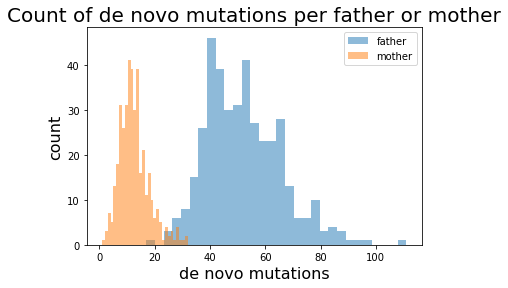

In [18]:
fig, ax = plt.subplots()
ax.hist(df_all_dnm_age['pat_dnm'], alpha = 0.5, bins = 30, label = 'father')
ax.hist(df_all_dnm_age['mat_dnm'], alpha=0.5, bins = 30, label = 'mother')
ax.set_xlabel('de novo mutations', fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_title('Count of de novo mutations per father or mother', fontsize=20)
plt.legend()

# Question 9: Significant difference in # dnm mat vs pat

In [10]:
stats.ttest_ind(df_all_dnm_age['pat_dnm'], df_all_dnm_age['mat_dnm']) #yes

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

# Question 10: Poisson Regression

In [11]:
model = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age", data = df_all_dnm_age)
results_mat = model.fit()
results_mat.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        15:10:32   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [12]:
model = smf.poisson(formula = "pat_dnm ~ 1 + Father_age", data = df_all_dnm_age)
results_pat = model.fit()
results_pat.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        15:10:32   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [13]:
model = smf.poisson(formula = "mat_dnm ~ 1 + pat_dnm", data = df_all_dnm_age)
results_dmn = model.fit()
results_dmn.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.04507
Time:                        15:10:32   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9885      0.055     36.355      0.000       1.881       2.096
pat_dnm        0.0105      0.001     10.793      0.000       0.009       0.012
==============================================================================
"""

# Question 11: Predict dnm based on father age 50.5 Poisson Regression

In [14]:
results_pat.params

Intercept     3.190257
Father_age    0.024096
dtype: float64

In [15]:
import math
math.exp(3.190257+0.024096*50.5)

82.03163782612788